<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

## Loading dataset

In [0]:
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [60]:
tf.__version__

'1.15.0'

In [61]:
url = "https://raw.githubusercontent.com/Tclack88/DS-Unit-4-Sprint-2-Neural-Networks/master/module3-Intro-to-Keras/amesHousePrice.csv"
df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
import seaborn as sb

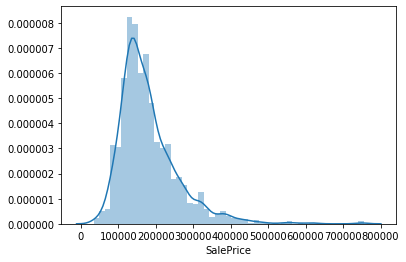

In [63]:
sb.distplot(df.SalePrice);

In [64]:
!pip install category_encoders

     |████████████████████████████████| 102kB 1.9MB/s 


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [0]:
df = df.drop(columns = ['Id']) # Id has no correlation

In [0]:
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']#.to_numpy().reshape(-1,1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
# get target data as column vectors
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [0]:
pipeline = Pipeline([('encoder', ce.OrdinalEncoder()),
                     ('imputer',SimpleImputer(strategy='mean')),
                     ('normalizer', Normalizer())])

In [0]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [72]:
X_train

array([[1.85133225e-03, 9.25666123e-05, 7.31276237e-03, ...,
        1.85966324e-01, 9.25666123e-05, 9.25666123e-05],
       [3.44228797e-02, 4.30285997e-04, 4.51800296e-03, ...,
        4.31576855e-01, 4.30285997e-04, 4.30285997e-04],
       [6.26638549e-03, 1.04439758e-04, 6.78858428e-03, ...,
        2.09715034e-01, 2.08879516e-04, 2.08879516e-04],
       ...,
       [7.48809418e-03, 9.36011773e-05, 7.02008830e-03, ...,
        1.87763962e-01, 1.87202355e-04, 1.87202355e-04],
       [4.46498888e-03, 5.95331851e-05, 6.07238488e-03, ...,
        1.19602169e-01, 1.19066370e-04, 1.19066370e-04],
       [3.75463050e-03, 6.25771749e-05, 4.19267072e-03, ...,
        1.25654967e-01, 6.25771749e-05, 6.25771749e-05]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [75]:
model = Sequential()
model.add(Dense(10, input_dim=79, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                800       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [0]:
# # Stolen from here https://github.com/keras-team/keras/issues/2850
# class NBatchLogger(Callback):
#     """
#     A Logger that log average performance per `display` steps.
#     """
#     def __init__(self, display=100):
#         self.step = 0
#         self.display = display
#         self.metric_cache = {}

#     def on_batch_end(self, batch, logs={}):
#         self.step += 1
#         for k in self.params['metrics']:
#             if k in logs:
#                 self.metric_cache[k] = self.metric_cache.get(k, 0) + logs[k]
#         if self.step % self.display == 0:
#             metrics_log = ''
#             for (k, v) in self.metric_cache.items():
#                 val = v / self.display
#                 if abs(val) > 1e-3:
#                     metrics_log += ' - %s: %.4f' % (k, val)
#                 else:
#                     metrics_log += ' - %s: %.4e' % (k, val)
#             print('step: {}/{} ... {}'.format(self.step,
#                                           self.params['steps'],
#                                           metrics_log))
#             self.metric_cache.clear()

In [76]:
model.fit(X_train, y_train, epochs=800, verbose=2)

Train on 1095 samples
Epoch 1/800
1095/1095 - 0s - loss: 39173636885.2749 - mean_squared_error: 39173636096.0000
Epoch 2/800
1095/1095 - 0s - loss: 39173530097.5050 - mean_squared_error: 39173529600.0000
Epoch 3/800
1095/1095 - 0s - loss: 39173366779.3242 - mean_squared_error: 39173365760.0000
Epoch 4/800
1095/1095 - 0s - loss: 39173142701.9397 - mean_squared_error: 39173136384.0000
Epoch 5/800
1095/1095 - 0s - loss: 39172829726.3927 - mean_squared_error: 39172829184.0000
Epoch 6/800
1095/1095 - 0s - loss: 39172398862.7288 - mean_squared_error: 39172403200.0000
Epoch 7/800
1095/1095 - 0s - loss: 39171820273.7388 - mean_squared_error: 39171821568.0000
Epoch 8/800
1095/1095 - 0s - loss: 39171040391.5982 - mean_squared_error: 39171039232.0000
Epoch 9/800
1095/1095 - 0s - loss: 39170030172.1132 - mean_squared_error: 39170031616.0000
Epoch 10/800
1095/1095 - 0s - loss: 39168752683.9525 - mean_squared_error: 39168757760.0000
Epoch 11/800
1095/1095 - 0s - loss: 39167098240.3507 - mean_squared

In [77]:
model.evaluate(X_train,y_train)

1095/1095 [==============================] - 0s 79us/sample - loss: 5573364831.3863 - mean_squared_error: 5573364224.0000


[5573364831.386301, 5573364000.0]

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### reshape mnist data

In [42]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [43]:
28**2

784

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [48]:
x_test.shape, x_train.shape

((10000, 784), (60000, 784))

In [49]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [51]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### create model 

In [52]:
np.unique(y_train) # looks like there are 10 distinct outputs to be predicted

array([0., 1.], dtype=float32)

In [0]:
fashion_model = Sequential()
fashion_model.add(Dense(16, input_dim=784, activation='sigmoid')) # 16 for both hidden layers was optimal for 3blue1brown
fashion_model.add(Dropout(.2))
fashion_model.add(Dense(16, activation='sigmoid'))
fashion_model.add(Dropout(.2))
fashion_model.add(Dense(10, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
fashion_model.fit(x_train,y_train, epochs=500)

Train on 60000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 50us/sample - loss: 1.2781 - acc: 0.4857
Epoch 2/500
60000/60000 [==============================] - 3s 51us/sample - loss: 1.1817 - acc: 0.5276
Epoch 3/500
60000/60000 [==============================] - 3s 51us/sample - loss: 1.1110 - acc: 0.5611
Epoch 4/500
60000/60000 [==============================] - 3s 51us/sample - loss: 1.0923 - acc: 0.5656
Epoch 5/500
60000/60000 [==============================] - 3s 51us/sample - loss: 1.0809 - acc: 0.5581
Epoch 6/500
60000/60000 [==============================] - 3s 51us/sample - loss: 1.1102 - acc: 0.5594
Epoch 7/500
60000/60000 [==============================] - 3s 52us/sample - loss: 1.0504 - acc: 0.5860
Epoch 8/500
60000/60000 [==============================] - 3s 52us/sample - loss: 1.0993 - acc: 0.5570
Epoch 9/500
60000/60000 [==============================] - 3s 52us/sample - loss: 1.0408 - acc: 0.5882
Epoch 10/500
60000/60000 [========================

In [58]:
fashion_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.6605 - acc: 0.7636


[0.6605187938690186, 0.7636]

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.